## Pré-processamento

Descobre as coordenadas limite da nave para possibilitar a criação de uma função que pune o agente caso ele permaneça nas extremidades do mapa por muito tempo.

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = gym.make("DemonAttackNoFrameskip-v4", obs_type="grayscale", render_mode="rgb_array")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [3]:
obs, info = env.reset()

reward, terminated, truncated = 0.0, False, False

def show_image(observation: np.ndarray) -> None:
    plt.imshow(observation, cmap="gray")
    plt.show()

def make_steps(action: int, n_steps: int = 1, plot: bool = True) -> None:
    global obs, reward, terminated, truncated, info
    for _ in range(n_steps):
        obs, reward, terminated, truncated, info = env.step(action)
    if plot:
        show_image(obs)

Ações:

<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Value</p></th>
<th class="head"><p>Meaning</p></th>
<th class="head"><p>Value</p></th>
<th class="head"><p>Meaning</p></th>
<th class="head"><p>Value</p></th>
<th class="head"><p>Meaning</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">0</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">NOOP</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">1</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">FIRE</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">2</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">RIGHT</span></code></p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">3</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">LEFT</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">4</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">RIGHTFIRE</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">5</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">LEFTFIRE</span></code></p></td>
</tr>
</tbody>
</table>

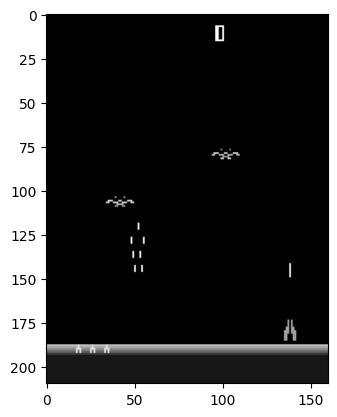

In [4]:
make_steps(4, 120)

In [5]:
ship_color = obs[178, 140]
ship_color

115

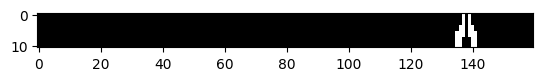

In [6]:
start = 150
ship = np.where(obs[150:] == ship_color)
top = ship[0][0] + start
bottom = ship[0][-1] + start

show_image(obs[top:bottom])

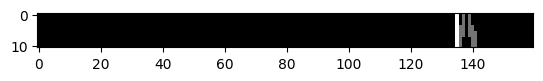

In [7]:
right = np.where(obs[bottom] == ship_color)[0][0]
obs[top:bottom, right:right+1] = 255
show_image(obs[top:bottom])

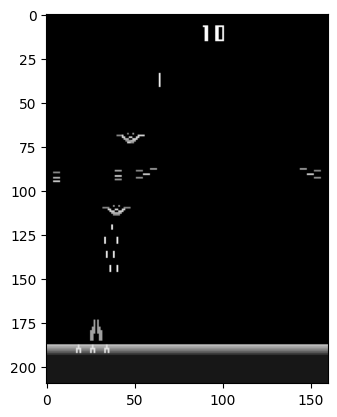

In [8]:
make_steps(5, 120)

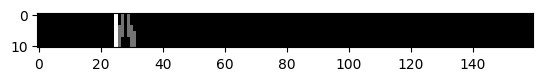

In [9]:
left = np.where(obs[bottom] == ship_color)[0][0]
obs[top:bottom, left:left+1] = 255
show_image(obs[top:bottom])

In [10]:
top, bottom, left, right

(174, 185, 25, 135)

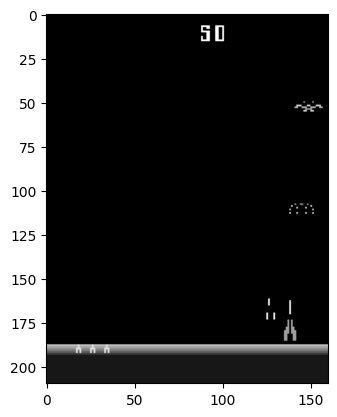

In [11]:
make_steps(4, 210)

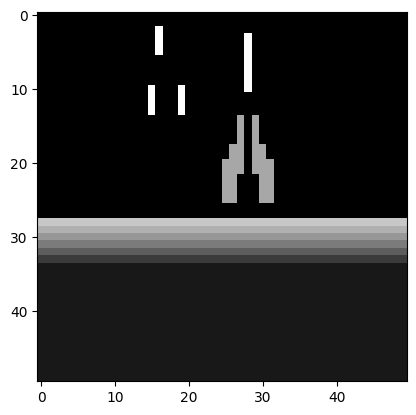

In [12]:
def center_around(img: np.ndarray, y: int, x: int, size: int = 25) -> np.ndarray:
    return img[y-size:y+size, x-size:x+size]

assert obs[bottom, right] == ship_color
show_image(center_around(obs, bottom, right))

## Descobrindo parâmetros

Número de frames entre a morte do agente e o registro de vida perdida.

Primeiro pixel afetado na morte: 5


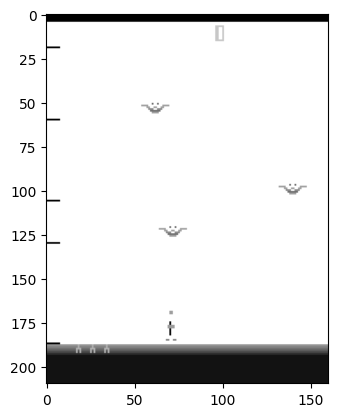

Frames desperdiçados até atualização do contador de vidas: 62


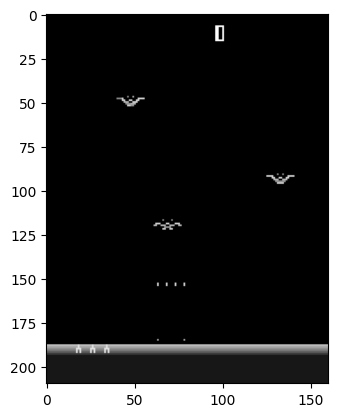

In [13]:
env = gym.make(
    "DemonAttackNoFrameskip-v4", obs_type="grayscale",
    render_mode="rgb_array", difficulty=1
)
obs, info = env.reset(seed=42)

make_steps(3, 20, plot=False)

i = 0
while obs[50, 0] == 0:
    make_steps(0, 1, plot=False)
    if i == 7200:
        raise RuntimeError("Imorrível!")
    i += 1

death_obs = obs
print("Primeiro pixel afetado na morte:", np.where(death_obs[:, 0])[0][0])
show_image(death_obs)
lives = info["lives"]
i = 0

while info["lives"] == lives:
    make_steps(0, 1, plot=False)
    i += 1

print("Frames desperdiçados até atualização do contador de vidas:", i)
show_image(obs)